<a href="https://colab.research.google.com/github/MinjuKim0217/Hands_On_Machine_Learning/blob/main/%5BHands_On_ML%5D_Chapter_4_Training_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4.0 Introduction

어떻게 모델이 작동하는지 잘 이해하고 있으면 적절한 모델, 올바른 훈련 알고리즘, 작업에 맞는 좋은 하이퍼 파라미터를 빠르게 찾을 수 있다. 

선형회귀, 그리고 비선형 데이터셋에 훈련시킬 수 있는 조금 더 복잡한 모델인 다항 회귀에 대해 다룰것이다.

로지스틱 회귀와 소프트맥스 회귀까지 보겠다. 


# 4.1 선형회귀

선형 회귀(Linear Regression)는 종속변수 y와 한 개 이상의 독립 변수(또는 설명 변수) X와의 선형 상관 관계를 모델링하는 회귀분석 기법입니다.



---


**선형 모델의 예측**

$y^=θ0+θ1x1+θ2x2+⋯+θnxn$

- y^ : 예측값
- n : 특성의 수
- xi : i번째 특성값
- θj : j번째 모델 파라미터



---


**선형 모델의 예측 벡터형태**

$y^=hθ(x)=θT⋅x$

- θ : 편향 θ0와 θ1에서 θn까지의 특성 가중치를 담고 있는 모델의 파라미터
- θT : θ의 전치(Transpose)
- x : x0에서 xn까지 담고있는 샘플의 특성 벡터(x0는 항상 1)
- hθ : 모델 파라미터 θ를 사용한 가설 함수
(편의상 벡터 표현식 x의 성분 중 첫번째 x0는 1이라 생각합니다.)



---

모델을 훈련시킨다는 뜻은 모델이 훈련세트에 가장 잘 맞도록 모델 파라미터를 설정하는것입니다. 그러기 위해선 모델의 예측값이 얼마나 실제 타겟값과 비슷한지를 알 수 있어야 합니다. 

회귀에서 가장 널리 쓰이는 성능 측정 지표는 평균 제곱근 오차 (RMSE) 입니다. 선형회귀 모델을 훈련시킨다는 것은 RMSE 를 최소화하는 θ를 찾는다는 것입니다. 



---

**평균 제곱 오차 비용함수(Mean square error cost function)**

$MSE(X,hθ)=(1/m)*∑mi=1(θT⋅xi−yi)^2$

- m : 선형모델을 훈련시킬 데이터 수
- θT⋅xi : i번째 데이터의 예측값
- yi : i번째 데이터의 실제 타겟값



# 4.1.1 정규방정식 (Normal Equation)

비용함수를 최소화하는 θ값을 찾기 위한 해석적인 방법이 있습니다. 다른 말로 하면 결과 값을 얻을 수 있는 수학 공식이 있습니다. 이를 정규방정식이라고 합니다. 


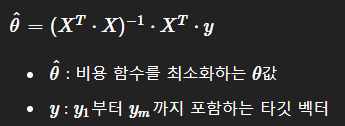

In [17]:
import numpy as np

X = 2 * np.random.rand(100,1)  ## 100X1의 의 배열로 무작위 숫자를 생성
y = 4 + 3 * X+np.random.randn(100,1) ## 약간의 노이즈를 섞은 일차함수
## rand는 rand 명령은 0부터 1사이에서 균일한 확률 분포로 실수 난수를 생성
## randn은 정규확률분포(Standard normal distribution)를 따르는 난수를 생성

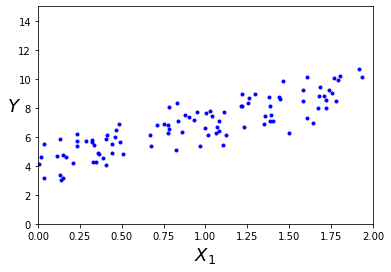

In [18]:
#matplotlib을 이용해 그래프로 표현

import matplotlib.pyplot as plt
plt.plot(X,y,"b.")
plt.xlabel("$X_1$", fontsize=18)
plt.ylabel("$Y$", rotation=0, fontsize=18)
plt.axis([0,2,0,15])
plt.show()

In [19]:
x_b = np.c_[np.ones((100,1)),X] ## 모든 샘플에 X0 = 1을 추가함
theta_best = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y) ## 정규방정식 코드구현

np.linalg.inv() : 넘파이의 선형대수 모듈(np.linalg)의 역행열 계산함수(.inv())

In [20]:
theta_best

array([[4.22788499],
       [2.77985443]])

우리가 사용한 함수는 $y=3x+4+노이즈$ 였습니다. 따라서 우리는 $θ0=4,θ1=3$이 나오기를 원했지만, 실제로는 $θ0=3.80162531,θ1=3.04060515$가 나왔습니다. 노이즈 때문에 근사하긴 하지만 정확한 값은 나오지 않습니다.

In [21]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new] ## 모든 샘플에 x0 = 1을 추가함
y_predict =  X_new_b.dot(theta_best) ## 훈련된 θ로 y를 예측하자
y_predict

array([[4.22788499],
       [9.78759385]])

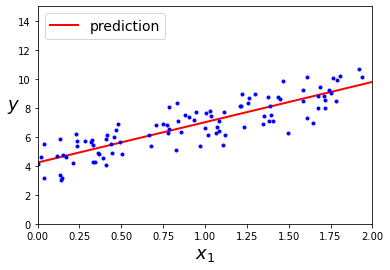

In [22]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label='prediction')
## 예측된 두개의 점을 빨간색 선으로 잇는다, 선의 굵기는 2, 범례는 'prediction'
plt.plot(X, y, "b.") ## X와 y에 해당 되는 점에 파란색 점을 찍음
plt.xlabel("$x_1$", fontsize=18) ## x축 밑에 이름은 x1으로 하고 size는 18
plt.ylabel("$y$", rotation=0, fontsize=18)
## y축 왼쪽에 이름은 y로 하고 회전시키지 말고 글자크기는 18
plt.legend(loc="upper left", fontsize=14) ## prediction의 위치를 왼쪽 위로 하고 크기는 14
plt.axis([0, 2, 0, 15]) ## x축의 크기를 0에서2 , y축의 크기는 0에서 15
plt.show()

In [23]:
# 사이킷런으로 더욱 쉽게 구할수 있다. 

from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_


(array([4.22788499]), array([[2.77985443]]))

$lin_reg.intercept_ : θ0, lin_reg.coef_ : θ1$


# 4.1.2 계산 복잡도(Computational complexity)

계산 복잡도는 일반적으로 컴퓨터가 주어진 식(혹은 코드)을 처리하는 속도와 처리할 때의 메모리 사용량를 의미합니다. 전자를 시간 복잡도, 후자를 공간 복잡도라고 합니다. 여러 표기 법이 있지만 여기서는 일반적으로 사용하는 빅오 표기법(Big-O notation)를 간단히 알아보도록 하겠습니다.



---

**빅오 표기법(Big-O notation)**

알고리즘의 소요시간이 입력의 크기의 n에 대해 O(n2)이라면 최대 n2에 비례하는 시간이 소요됩니다. 수학적으로 표현하자면 O(g(n))은 점근적 증가율이 g(n)을 넘지 않는 모든 함수의 집합입니다.

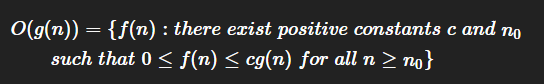

우리가 위에서 구현한 정규방정식은 크기가 $(n+1)×(n+1)$되는 행렬 $X^T⋅X$의 역행렬을 계산합니다(n : 특성수). 이 역행렬의 계산 복잡도는 일반적으로 $O(n^(2.4))$에서 $O(n^3)$사이 입니다. 즉, 특성수가 두배로 늘어난다면 복잡도는 적게는 2^2.4배 크게는 2^3배만큼 늘어납니다. 특성수가 많아지면 정규방정식 처리 속도는 매우 느려 진다는 의미입니다.


그래도 이 공식(역행렬 계산함수)의 복잡도는 샘플 수에는 선형적이라고 합니다. 따라서 메모리 공간만 충분하다면 큰 훈련세트도 무리없이 처리할 수 있습니다.


정규 방정식이나 다른 알고리즘으로 학습시킨 선형 회귀 모델의 예측은 처리 속도가 매우 빠릅니다. 그리고 그 예측 계산 복잡도는 샘플 수와 특성 수에 비례합니다. 즉, 샘플 수나 특성 수가 두배로 늘어나면 처리에 걸리는 시간도 두배로 늘어납니다.

# 4.2 경사 하강법 (Gradient Descent)

특성이 매우 많고 훈련 샘플이 너무 많을 때 사용하기 적합한 알고리즘 중 하나가 바로 경사 하강법입니다. 경사 하강법은 어떤 비용함수에서 그 파라미터를 계속 조정해서 최적의 파라미터를 찾는 방법입니다. 파라미터의 그래디언트(Gradient)를 감소시키다가 그래디언트가 0이 되는 곳을 찾는 것입니다.

경사 하강법의 중요한 파라미터는 학습률(Learning late)입니다. 학습률이 너무 작으면 알고리즘이 수렴하기 위해 반복을 많이 해야하고 학습률이 너무 크면 최솟값을 건너 뛰게 됩니다.


---

학습률이 너무 클 때
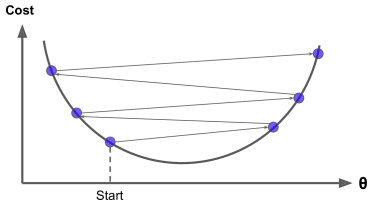

학습률이 너무 작을 때
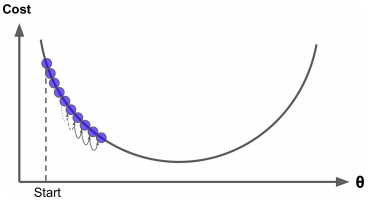


경사 하강법의 문제점
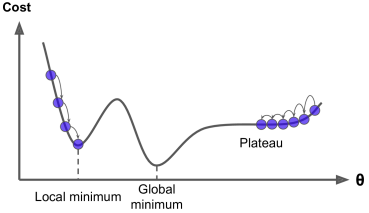

경사 하강법을 사용할 때는 특성들의 스케일이 같도록 만들어줘야 합니다. 그렇지 않으면 최솟값에 도달하는 시간이 오래 걸립니다. 따라서 스케일러(예를들면 사이킷런의 StandardSaler)를 사용해 스케일링을 해줍시다.

# 4.2.1 배치 경사 하강법


In [24]:
eta = 0.1 # 학습률
n_iterations = 1000 ## 반복 횟수
m = 100
theta = np.random.randn(2,1) ## 정규분포 확률로 난수를 골라 2X1행렬에 넣음
for iteration in range(n_iterations):
    gradients = 2/m * x_b.T.dot(x_b.dot(theta) - y) ## 그래디언트 벡터를 구함
    theta = theta - eta * gradients ## 새로운 theta(파라미터)에 대입

In [25]:
theta

array([[4.22788499],
       [2.77985443]])

# 4.2.2 확률적 경사 하강법(Stochastic Gradient Descent)

매 스텝마다 딱 한개의 샘플을 무작위로 선택하고 그 하나의 샘플에 대한 그래디언트를 계산해서 파라미터를 훈련시키는 방법입니다. 작은 데이터만 처리하기 때문에 배치 경사 하강법 보다 훨씬 빠르고 메모리가 적게 들어 큰 훈련세트도 훈련시킬 수 있습니다. 확률적 경사 하강법은 지역 최솟값을 건너 뛸 수 있도록 도와주므로 배치 경사하강법 보다 전역 최솟값을 찾을 가능성이 높습니다. 확률적이기 때문에 최솟값에 근접하지만 최솟값에 안착하지는 못할 것입니다. 학습이 딜레마를 해결하는 방법은 학습률을 점진적으로 감소시키기는 것입니다.


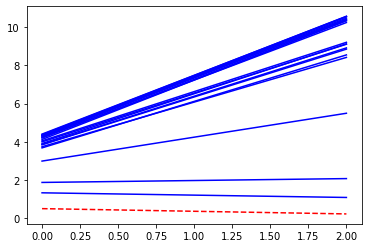

In [26]:
theta_path_sgd = []
m = len(x_b) # 100
np.random.seed(42)

n_epochs = 50 ## 한 반복에서 m번 되풀이 되는데, 이 때 한 번의 반복을 epoch라 한다.
t0, t1 = 5, 50  # 학습 스케줄 하이퍼파라미터(매 반복에서 학습률을 결정하는 파라미터)
def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # 무작위 초기화

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20 :         #첫 반복의 20까지 #책에는 빠짐
            y_predict = X_new_b.dot(theta)# 0과 2의 예측값 #책에는 빠짐
            style = "b-" if i > 0 else "r--" # 0이 아닐 때는 파란 실선 0일 때는 빨간 점선 # 책에는 빠짐
            plt.plot(X_new, y_predict, style)# 그래프를 그려라 # 책에는 빠짐
        random_index = np.random.randint(m) ## 0부터 99사이의 값 중 하나를 랜덤으로 선택
        xi = x_b[random_index:random_index+1] ## 데이터 중 하나의 샘플을 선택
        yi = y[random_index:random_index+1] ## 선택한 샘플 데이터의 타겟값 선택
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi) ## 하나의 샘플로만 그래디언트 계산
        eta = learning_schedule(epoch * m + i) ## epoc와 i가 감소 할 때마다 학습률 감소
        theta = theta - eta * gradients ## 새로운 세타를 대입
        theta_path_sgd.append(theta)    ## 리스트에 튜닝돼서 나오는 theta다 넣음  

샘플들이 랜덤으로 선택이 되므로 한 에포크에서 어떤 샘플은 선택되지 않을 수 있습니다. 모든 샘플을 다 사용하게 하려면 한 에포크에서 훈련 세트를 섞고 하나씩 차례대로 하나씩 선택 후 다음 에포크에서 다시 훈련 세트를 섞어야 되는데 이렇게 하면 수렴 시간이 오래 걸립니다.

In [27]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=50, penalty=None, eta0=0.1, random_state=42)
## 최대 반복이 50번, panalty는 없음, eta0는 처음 학습률을 뜻함.
sgd_reg.fit(X, y.ravel()) ## y.ravel은 배열을 1차원 배열로 만들어주는 함수

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=50,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=42,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

# 4.2.3 미니 배치 경사 하강법(Mini-batch Gradient Descent)

미니 배치라 부르는 임의의 작은 샘플 세트에 대해 그래디언트를 계산하는 경사 하강법입니다. 확률적 경사 하강법보다 덜 불규칙하므로 최솟값에 더 가까이 도달하게 됩니다. 하지만 지역 최솟값에서 빠져나오기 힘들 수도 있습니다.

선형 회귀를 사용한 알고리즘 비교
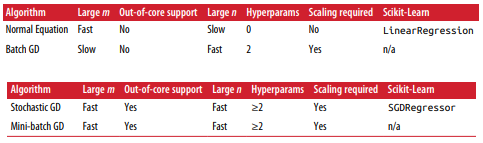

데이터의 개수가 많으면 배치 경사 하강법이 좋지 않습니다. 특성의 수(데이터의 벡터 차원)가 크다면 정규 방정식은 좋지 않습니다.

외부 메모리 학습 지원이란 컴퓨터 한 대의 메인 메모리에 들어갈 수 없는 아주 큰 데이터셋을 학습할 때 시스템에 온라인 학습 알고리즘을 사용하는 것입니다.

확률적 경사 하강법과 미니 배치 경사 하강법은 훈련할 때 샘플 하나 혹은 작은 묶음으로 훈련을 하므로 외부 메모리 학습이 가능합니다.




# 4.3 다항 회귀(Polynomial Regression)

비선형 데이터를 학습하는데 특성의 거듭제곱을 새로운 특성으로 추가하고 추가한 데이터셋에 선형 모델을 훈련시키는 기법입니다.

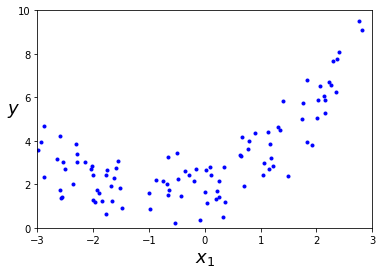

In [28]:
## 약간의 노이즈가 있는 2차 함수를 따르는 데이터셋 만들기
m = 100
X = 6 * np.random.rand(m, 1) - 3 ## -3부터 3 까지 랜덤하게
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)  ##  y 값은 약간의 노이즈가 있는 2차 함수

## x,y를 그래프에 나타내면
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

In [29]:
#사이킷런의 PolynomieaFeatures로 데이터의 제곱값들을 특성에 추가합니다.
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)  
## degree=2 이면 제곱값들을 특성으로 추가 default는 2, include_bias는 x0=1을 추가할지 말지 경정, default 는 True
X_poly = poly_features.fit_transform(X)
X_poly[0] ## X데이터의 특성에 제곱값이 추가 됨.

array([0.32022714, 0.10254542])

In [30]:
in_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.00533282]), array([[0.92694729, 0.50087548]]))

y절편은 2.09060416, x2의 계수는 1.00332088, x의 계수는 0.45237349로 예측을 하였습니다.


만약 특성의 개수가 하나가 아니라 두개라면 PolynomialFeatures가 주어진 차수까지 특성 간의 모든 교차항을 추가합니다. 예를 들어 특성 a와 b가 있고 차수가 2라면 a2, b2뿐만 아니라 ab도 추가됩니다.

# 학습 곡선(Learning Curve)

학습 곡선은 훈련 세트와 검증 세트의 모델 성능을 훈련 세트 크기의 함수로 나타냅니다.

In [31]:
# 학습 곡선을 그리는 함수를 정의
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):  
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=20)
    ## X와 y 각각에서 20%를 test set(validate set)으로 쓰고 나머지는 train set으로 씀
    ## seed는 20
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])  ##  X의 train set의 1열에서 m열까지 모델에 훈련
        y_train_predict = model.predict(X_train[:m]) ## 변수에 train set의 m열까지의 예측값을 넣음
        y_val_predict = model.predict(X_val) ## 변수에 test set(validatae set)의 예측값을 넣음  
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        # 리스트에 m열까지의 실제 값과 m열까지의 train set의 예측값의 에러를 넣음
        val_errors.append(mean_squared_error(y_val, y_val_predict))
        # 리스트에 validate set의 실제값과 예측값의 에러를 넣음

    plt.plot(np.sqrt(train_errors), "r+-", linewidth=2, label='training')
    ## for문이 데이터 X의 크기에 따라서 돌아가므로 X축이 train set의 크기. y 값은 그에 따른 train set의 RMSE
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="test")
    ## X축은 똑같고 y 값은 test set(validate set)의 RMSE
    plt.legend(loc="upper right", fontsize=14)      
    plt.xlabel("size of train_set", fontsize=14)       
    plt.ylabel("RMSE", fontsize=14)

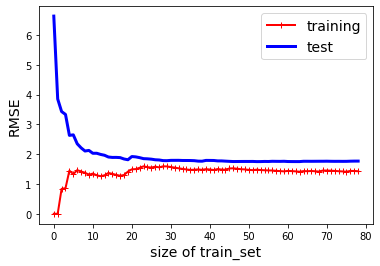

In [32]:
lin_reg= LinearRegression()
plot_learning_curves(lin_reg,X,y)

비선형이기 때문에 훈련데이터에 완벽히 훈련될 수 없으므로 훈련 데이터의 에러가 어느 정도에서 평평해집니다. 검증 데이터도 마찬가지로 훈련이 잘 되감에 따라 에러가 점점 감소하지만 훈련세트 아래로는 감소하지 않습니다. 이 학습 곡선은 과소적합의 예입니다. 수 곡선이 거의 평행을 이루는 구간이 있고, 꽤 높은 오차에서 서로 근접해 있습니다.

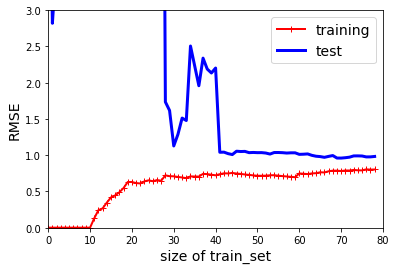

In [33]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ]) ## 10차로 만들어주는PolynomialFeatures와 LinearREgression을 한번에 해주는 파이프라인

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])           
plt.show()                        

# 규제가 있는 선형 모델

과대적합을 줄이기 위해서는 모델의 자유도를 줄여야합니다. 이를 ‘모델을 제한한다’라고 표현합니다. 예를 들어 다항 회기 모델을 규제하는 방법은 다항식의 차수를 감소시키는 것입니다. 선형 회귀에서는 보통 모델의 가중치를 제한하여 규제를 가합니다. 가중치를 제한하는 3가지 규제 방법을 알아보도록 합시다.

# 4.5.1 릿지 회귀(Ridge Regression)


릿지 회귀의 비용 함수 수식


$J(θ)=MSE(θ)+α*(1/2)∑(i=1) nθ^2_i$

하이퍼파라미터 α는 모델을 얼마나 규제할지 조절합니다.

- α=0이면 릿지 회귀는 선형 회귀와 같아진다.
- α가 아주 크면 모든 가중치가 거의 0에 가까워지고 결국 데이터의 타겟값의 평균을 지나는 수평선이 된다(θ0만 남는다).

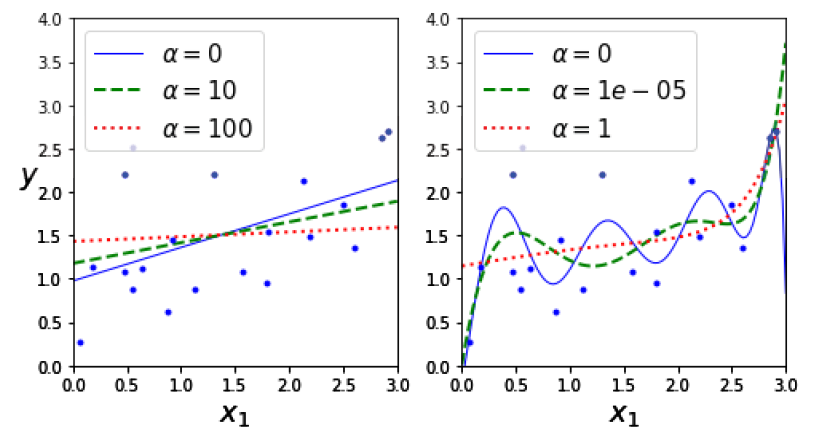


릿지 회귀는 입력특성의 스케일링에 민감하기 때문에 스케일을 맞추는 것이 중요합니다. 규제가 있는 모델은 대부분 마찬가지입니다.

릿지 회귀의 정규 방정식

$θ^=(X^T⋅X+αA)−1⋅X^T⋅y$

In [34]:
# 다음은 사이킷런에서 정규방정식을 사용한 릿지 회귀를 적용하는 예입니다.
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
# solver의 기본값은 auto. 희소행렬이나 singular matrix가 아닐 경우 cholesky가 된다.
# 숄레스키를 사용하면 성능이 좋다?
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[4.48563194]])

In [35]:
# 다음은 확률적 경사 하강법을 사용했을 때 입니다.
sgd_reg = SGDRegressor(max_iter=5, penalty="l2", random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([3.45084605])